In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', None)

In [3]:
data.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [4]:
data.shape

(9240, 37)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
data = data.replace('Select',np.nan) #Converted the Select attribute to null values in the dataset

In [8]:
np.round((data.isnull().sum()/len(data.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### The Prospect ID and Lead Number have unique values and there is no redundancy. So these columns can be dropped as they will not affect the prediction

In [9]:
data = data.drop(['Prospect ID','Lead Number'],axis=1) #dropping these columns as they have unique values which do not effect the prediction

In [10]:
data = data.drop(['Lead Profile','How did you hear about X Education'],axis = 1) #dropped these columns because they have more than 70% of the missing values

### The columns like Lead Quality can be dropped because the quality of lead is based on the data and the intuition of the employee assigned to that particular task. Tags can also be dropped.

### The columns like Asymmetrique Activity Index, Asymmetrique Activity Score, Asymmetrique Profile Index, Asymmetrique Profile Score can be dropped because these are assigned by the sales team after progressing the potential leads. The missing values are also high which is almost equal to 45%

In [11]:
data = data.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score','Tags'],axis =1)

### The features which have constant values in the dataset are called Constant Features. These are nothing but the redundant data which available in the dataset. They do not affect the target feature

In [12]:
constant_features = []
for feature in list(data.columns):
    if data[feature].unique().size < 2:
        constant_features.append(feature)
constant_features

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [13]:
data = data.drop(constant_features,axis =1)

In [14]:
bool_features = []
categorical_features = []
numerical_features = []
target_feature = []

for feature in data.columns:
    if feature in ('Converted'):
        target_feature.append(feature)
    elif data[feature].nunique()==2:
        bool_features.append(feature)
    elif data[feature].dtype =='object':
        categorical_features.append(feature)
    elif data[feature].dtype ==('int64','float64'):
        numerical_features.append(feature)
    else:
        numerical_features.append(feature)
        

In [15]:
bool_features

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [16]:
categorical_features

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'City',
 'Last Notable Activity']

In [17]:
numerical_features

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [18]:
target_feature

['Converted']

In [19]:
for feature in bool_features:
    data[feature] = data[feature].apply(lambda x:1 if x=='Yes' else 0)
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,NaN,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,NaN,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Mumbai,0,Modified


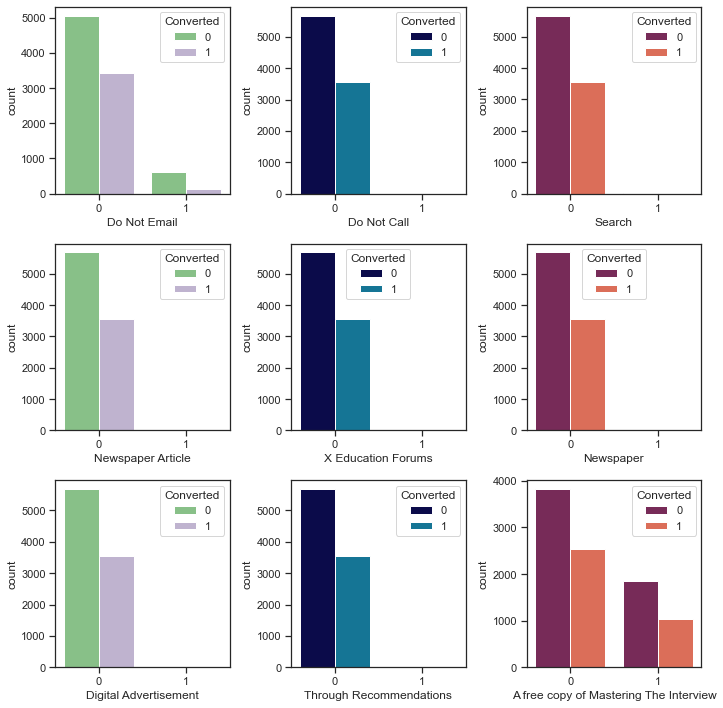

In [20]:
colors = ['Accent', 'ocean', 'rocket'] * 3
sns.set(style='ticks',color_codes=True)
plt.figure(figsize = (10,10))
for i, x_var in enumerate(bool_features):
    plt.subplot(3, 3, i+1)
    chart = sns.countplot(x = x_var, data = data, hue='Converted', palette=colors[i])
    chart.set_xticklabels(chart.get_xticklabels())
    plt.tight_layout()

In [21]:
for feature in bool_features:
    print(data[feature].value_counts())

0    8506
1     734
Name: Do Not Email, dtype: int64
0    9238
1       2
Name: Do Not Call, dtype: int64
0    9226
1      14
Name: Search, dtype: int64
0    9238
1       2
Name: Newspaper Article, dtype: int64
0    9239
1       1
Name: X Education Forums, dtype: int64
0    9239
1       1
Name: Newspaper, dtype: int64
0    9236
1       4
Name: Digital Advertisement, dtype: int64
0    9233
1       7
Name: Through Recommendations, dtype: int64
0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64


### From the above plots and value counts, the columns A free copy of Mastering The Interview and Do Not Email have two values. Other columns have only one value which is No. So we can drop these columns as they do not contribute to the analysis.

In [22]:
data = data.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                 'Through Recommendations'],axis = 1)

In [23]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [24]:
numerical_features

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

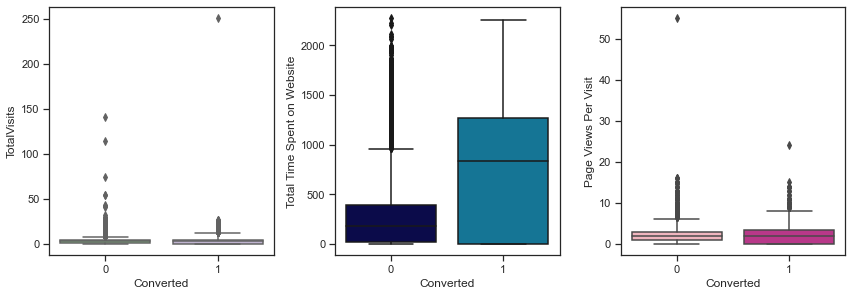

In [25]:
sns.set(style='ticks',color_codes=True)
colors = ['Accent', 'ocean' , 'RdPu'] 
plt.figure(figsize = (12, 12))
for i, var in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'Converted', y = var, data = data, palette=colors[i])
    plt.tight_layout()

In [26]:
outliers_cap = ['TotalVisits','Page Views Per Visit']

In [27]:
for i,feature in enumerate(outliers_cap):
    q1 = data[feature].quantile(0.01)
    q4 = data[feature].quantile(0.99)
    data[feature][data[feature]<=q1]=q1
    data[feature][data[feature]>=q4]=q4

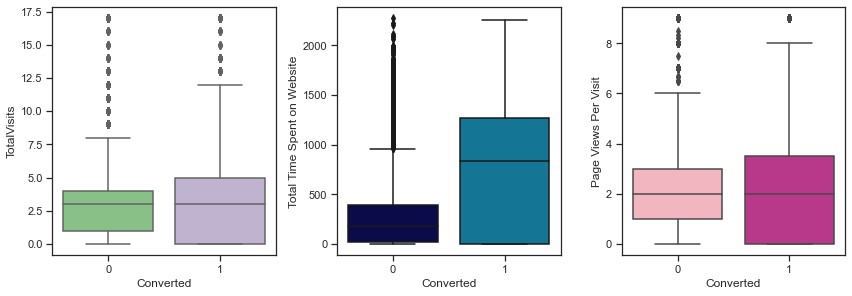

In [28]:
sns.set(style='ticks',color_codes=True)
colors = ['Accent', 'ocean' , 'RdPu'] 
plt.figure(figsize = (12,12))
for i, feature in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'Converted', y = feature, data = data, palette=colors[i])
    plt.tight_layout()

In [29]:
mean_visits = data['TotalVisits'].median()
data['TotalVisits'] = data['TotalVisits'].fillna(value=mean_visits)

In [30]:
mean_view = data['Page Views Per Visit'].median()
data['Page Views Per Visit'] = data['Page Views Per Visit'].fillna(value=mean_view)

In [31]:
categorical_features

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'City',
 'Last Notable Activity']

In [32]:
data['Lead Source'] = data['Lead Source'].replace(np.nan,'not provided')

In [33]:
data['Lead Source'] = data['Lead Source'].replace(['blog','google','bing','Pay per Click Ads','Bing','Social Media','WeLearn',
                                                  'Click2call','Live Chat','welearnblog_Home','youtubechannel','testone',
                                                  'Press_Release','NC_EDM'],'Other_sources')

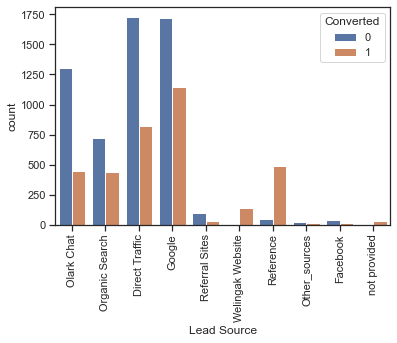

In [34]:
sns.countplot(x = 'Lead Source',hue='Converted',data=data)
plt.xticks(rotation='vertical')
plt.show()

1. Leads generated by Google and Direct Traffic are maximum.
2. Conversion rate generated by Direct Traffic and Google is maximum.
3. The conversion rate is high for Reference and Wellingak Website.
4. To improve the conversion rate and number of leads, the company should focus on all the Lead Sources generated.
5. It should also make sure that the number of leads are also increasing.

In [35]:
data['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

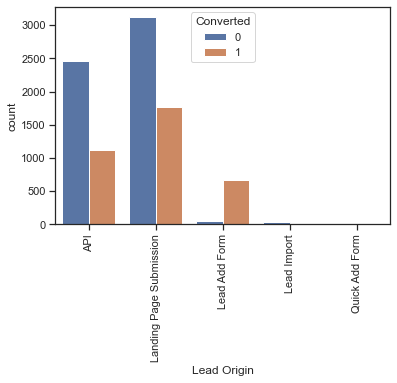

In [36]:
sns.countplot(x='Lead Origin',hue='Converted',data=data)
plt.xticks(rotation='vertical')
plt.show()

1. API and Landing Page Submission have got high conversion rate and number of leads compared to the other categories of Lead Origin.
2. Lead Add Form has got more conversion rate but less number of leads.
3. Lead import has got very few leads as well as the conversion rate.
4. To improve the overall conversion, the company should concentrate on all the categories of the Lead Origin. Particularly, it should focus on Lead Add Form and Lead Import to increase the conversion rate and the number of leads. 
5. Teh company should also focus onn the API and Landing Page Submission to imporve the conversion rate.

In [37]:
data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [38]:
data['Last Activity'] = data['Last Activity'].replace(np.nan,'not provided')

In [39]:
data['Last Activity'] = data['Last Activity'].replace(['Approached upfront','Visited Booth in Tradeshow','Resubscribed to emails',
                                                      'Email Received','Email Marked Spam','View in browser link Clicked','Had a Phone Conversation'],'Other_Activity')

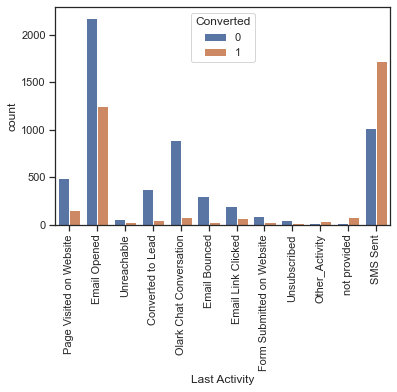

In [40]:
sns.countplot(x='Last Activity',hue='Converted',data=data)
plt.xticks(rotation='vertical')
plt.show()

1. The conversion rate for the SMS sent is high compared to all the Last Activities.
2. The number of leads for the Emails Opened is high.
3. The company should make sure to focus on all the Last Activities by keeping the website engaging, sending offer related emails etc.

In [41]:
data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [42]:
data['Specialization'] = data['Specialization'].replace(np.nan,'Others')

In [43]:
data['Specialization'] = data['Specialization'].replace(['Supply Chain Management','IT Projects Management','Finance Management','Human Resource Management',
                                                        'Marketing Management','Operations Management','Retail Management','Hospitality Management',
                                                        'Healthcare Management'],'Management_Courses')

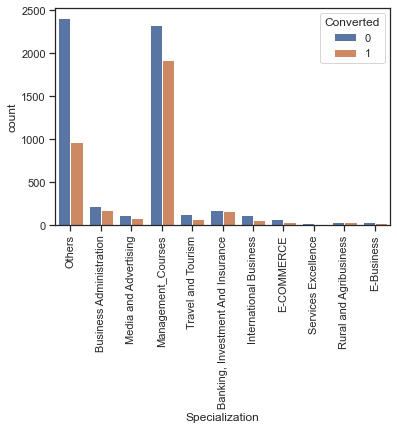

In [44]:
sns.countplot(x='Specialization',hue='Converted',data=data)
plt.xticks(rotation='vertical')
plt.show()

1. The conversion rate for Management Courses is high.

In [45]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [46]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan,'not provided')

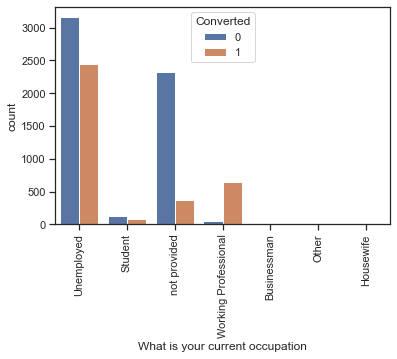

In [47]:
sns.countplot(x='What is your current occupation',hue='Converted',data=data)
plt.xticks(rotation='vertical')
plt.show()

1. The conversion rate for Working Professional is high.
2. The company should make sure that the number of leads from the Working Professional can be increased by reaching them out through phone calls, emails, social networking websites which increases the conversion rate also.
3. The count of number of leads from the Unemployed category is high. The conversion rate can be incerased in this category by offering some promotions,offers etc.

In [48]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [49]:
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan,'not provided')

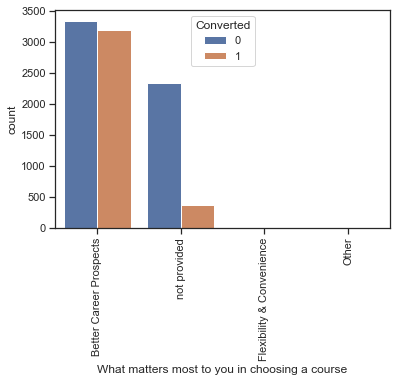

In [50]:
sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=data)
plt.xticks(rotation='vertical')
plt.show()

In [51]:
data['Country'] = data['Country'].replace(np.nan,'Other_countries')

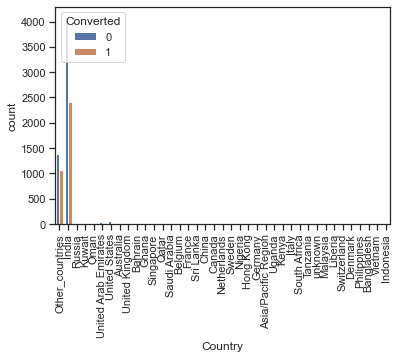

In [52]:
sns.countplot(x = 'Country',hue='Converted',data=data)
plt.xticks(rotation='vertical')
plt.show()

In [53]:
data['City'] = data['City'].replace(np.nan,'Mumbai')

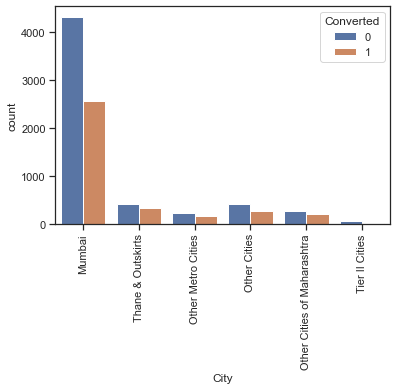

In [54]:
sns.countplot(x='City',hue='Converted',data=data)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation','Approcahed upfront','Approached upfront','Resubscribed to emails',
                                                                     'View in browser link Clicked','Form Submitted on Website','Email Received',
                                                                     'Email Marked Spam','Unreachable'],'Other_Last_Notable_Activity')

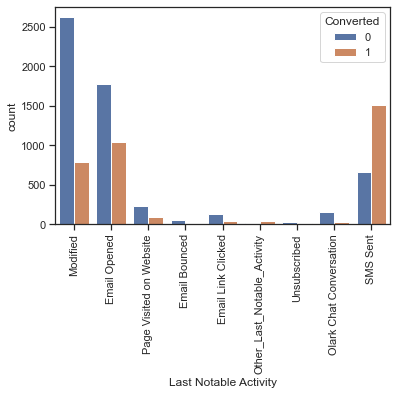

In [56]:
sns.countplot(x='Last Notable Activity',hue='Converted',data=data)
plt.xticks(rotation='vertical')
plt.show()

### The data present in the columns Country,What matters to you most in choosing a course are highly skewed so the columns can be dropped. The column City can also be dropped because the data is skewed and it has got moderate % of missing values

In [57]:
data = data.drop(['Country','What matters most to you in choosing a course','City','Last Notable Activity'],axis=1)

In [58]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [59]:
categorical_features = []
for feature in data.columns:
    if data[feature].dtype =='object':
        categorical_features.append(feature)
categorical_features

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation']

In [60]:
 for feature in data.columns:
    if data[feature].dtypes=='O':
        print(feature,':',len(data[feature].unique()),'labels')

Lead Origin : 5 labels
Lead Source : 10 labels
Last Activity : 12 labels
Specialization : 11 labels
What is your current occupation : 7 labels


In [61]:
for feature in categorical_features:
    dummy = pd.get_dummies(data[feature],drop_first=False,prefix=feature)
    data = pd.concat([data,dummy],1)

In [62]:
data = data.drop(categorical_features,axis =1)

In [63]:
correlation = data.corr()
correlation.style.apply(lambda x:
                       ['background lightblue' if abs(v) > 0.5
                       else
                       ('background lightyellow' if abs(v)>0.3
                       else '') for v in x],axis =1)

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_not provided,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_not provided,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Courses,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided
Do Not Email,1.000000,-0.135580,0.008974,-0.046374,0.023875,0.055762,-0.084110,0.095304,-0.020983,-0.017529,0.035416,0.109314,-0.017529,-0.071647,-0.051436,0.034295,0.012930,-0.038451,-0.010149,-0.000911,0.065143,-0.062835,0.618470,-0.043505,-0.218621,-0.018744,-0.055143,-0.005679,0.082217,-0.017564,0.006465,0.262686,-0.031189,-0.020998,0.003893,0.012636,0.033293,0.005416,0.002532,-0.000343,-0.037805,0.028032,0.053781,0.059722,-0.008647,-0.009669,-0.002609,0.006225,-0.019533,-0.049841,0.049611
Converted,-0.135580,1.000000,0.043716,0.362483,-0.004603,-0.039820,-0.120822,-0.051236,0.321702,-0.023695,0.013138,-0.080682,-0.023695,0.020044,-0.129459,-0.005879,-0.007245,0.270830,-0.033058,0.154153,0.053993,-0.117383,-0.120095,-0.039690,-0.032934,-0.033364,-0.210809,0.052061,-0.083771,0.325600,-0.010785,-0.020618,0.087484,0.043518,0.025791,-0.002747,-0.006429,-0.007441,0.126233,0.010264,-0.154025,0.007200,-0.014956,-0.009457,0.014493,0.041567,0.020505,-0.004375,0.128710,0.313837,-0.326349
TotalVisits,0.008974,0.043716,1.000000,0.324556,0.706203,0.280920,-0.281352,0.408685,-0.237099,-0.044902,-0.001056,0.119074,-0.043159,0.177950,-0.446415,0.289378,0.009040,-0.198982,0.086776,-0.110523,-0.052092,-0.097345,-0.063030,-0.028923,0.049544,0.021671,-0.196371,0.027729,0.247987,0.007934,0.027376,0.007453,-0.010781,0.076109,0.064326,0.026680,0.038076,0.053816,0.207822,0.065970,-0.363043,0.048495,0.026495,0.098902,0.017527,-0.008440,0.037699,-0.030557,0.071988,-0.001191,-0.070683
Total Time Spent on Website,-0.046374,0.362483,0.324556,1.000000,0.336715,0.168298,-0.201239,0.276009,-0.139681,-0.034926,0.032831,0.132926,-0.033930,0.205604,-0.376768,0.096123,-0.001630,-0.107361,0.011327,-0.078543,-0.038144,-0.010555,-0.028543,-0.041355,0.000644,0.008140,-0.191667,0.024035,0.028051,0.117223,0.004812,-0.003969,0.089492,0.040574,0.053244,0.018988,0.001162,0.022154,0.202495,0.040589,-0.287133,0.020672,0.002900,0.042640,0.012526,0.007088,0.028115,-0.012518,0.086366,0.099241,-0.150718
Page Views Per Visit,0.023875,-0.004603,0.706203,0.336715,1.000000,0.292589,-0.371352,0.520359,-0.279637,-0.051459,-0.001737,0.146086,-0.048604,0.230982,-0.535693,0.319846,0.010025,-0.233923,0.084158,-0.129644,-0.059792,-0.065697,-0.038142,-0.039554,0.067686,0.012402,-0.243285,0.015961,0.111143,0.075744,0.042191,0.020798,-0.017723,0.088945,0.062734,0.040847,0.048700,0.074469,0.257057,0.071861,-0.432308,0.029741,0.021741,0.117566,0.015246,-0.007999,0.02

In [64]:
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
X = data.drop('Converted',axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_not provided,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_not provided,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Courses,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided
0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [67]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_not provided,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_not provided,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Courses,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided
1871,0,-1.022595,-0.885371,-1.180474,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6795,0,0.205373,0.005716,-0.503379,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3516,0,0.512365,-0.691418,0.092260,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8105,0,0.512365,1.365219,1.364995,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3934,0,-1.022595,-0.885371,-1.180474,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [68]:
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_not provided,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_not provided,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Courses,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided
4269,0,1.433341,0.964504,2.892276,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2376,0,-1.022595,-0.885371,-1.180474,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7766,0,0.512365,-0.777416,1.364995,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
9199,0,-1.022595,-0.885371,-1.180474,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4359,0,-1.022595,-0.885371,-1.180474,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [69]:
model1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6422
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 17 Feb 2022   Deviance:                   1.7426e+05
Time:                        10:22:16   Pearson chi2:                 8.52e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 9.542e+14   1.02e+07   9.38e+07      0.000    9.54e+14    9.54e+14
Do Not Email                                         -9.004e+13   4.36e+06  -2.06e+07      0.000      -9e+13      -9e+13
TotalVisits                                           2.285e+14   1.23e+06   1.86e+08      0.000    2.29e+14    2.29e+14
Total Time Spent on Website                           3.921e+08    772.901   5.07e+05      0.000    3.92e+08    3.92e+08
Page Views Per Visit                                 -1.378e+14   7.41e+05  -1.86e+08      0.000   -1.38e+14   -1.38e+14
A free copy of Mastering The Interview               -6.095e+14   2.58e+06  -2.37e+08      0.000    -6.1e+14    -6.1e+14
Lead Origin_API                                      -1.224e+15   1.96e+07  -6.25e+07      0.000   -1.22e+15   -1.22e+15
Lead Origin_Landing Page Submission                   -5.23e+14   1.95e+07  -2.69e+07      0.000   -5.23e+14   -5.23e+14
Lead Origin_Lead Add Form                             9.536e+13      2e+07   4.76e+06      0.000    9.54e+13    9.54e+13
Lead Origin_Lead Import                              -6.181e+14   4.09e+07  -1.51e+07      0.000   -6.18e+14   -6.18e+14
Lead Origin_Quick Add Form                            3.224e+15   5.87e+07    5.5e+07      0.000    3.22e+15    3.22e+15
Lead Source_Direct Traffic                           -5.459e+14   1.12e+07  -4.88e+07      0.000   -5.46e+14   -5.46e+14
Lead Source_Facebook                                  -3.81e+14   4.32e+07  -8.81e+06      0.000   -3.81e+14   -3.81e+14
Lead Source_Google                                   -4.537e+14   1.11e+07  -4.09e+07      0.000   -4.54e+14   -4.54e+14
Lead Source_Olark Chat                                1.162e+15   1.12e+07   1.04e+08      0.000    1.16e+15    1.16e+15
Lead Source_Organic Search                           -6.276e+13   1.12e+07  -5.59e+06      0.000   -6.28e+13   -6.28e+13
Lead Source_Other_sources                            -3.156e+13   1.45e+07  -2.18e+06      0.000   -3.16e+13   -3.16e+13
Lead Source_Reference                                 1.664e+14   1.68e+07   9.92e+06      0.000    1.66e+14    1.66e+14
Lead Source_Referral Sites                            2.409e+14   1.27e+07   1.89e+07      0.000    2.41e+14    2.41e+14
Lead Source_Welingak Website                          6.029e+14   1.77e+07    3.4e+07      0.000    6.03e+14    6.03e+14
Lead Source_not provided                              2.568e+14   1.95e+07   1.32e+07      0.000    2.57e+14    2.57e+14
Last Activity_Converted to Lead                       6.901e+14   4.26e+06   1.62e+08      0.000     6.9e+14     6.9e+14
Last Activity_Email Bounced                           9.80

In [70]:
model_log = LogisticRegression()
rfe = RFE(model_log,15)
rfe = rfe.fit(X_train,y_train)

In [71]:
rfe_columns = X_train.columns[rfe.support_]
rfe_columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_not provided',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not provided'],
      dtype='object')

In [72]:
def model_generation(model_num,columns):
    X_train_sm = sm.add_constant(X_train[rfe_columns])
    model_num = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
    
    result = model_num.fit()
    print(result.summary())
    return result

In [73]:
def cal_VIF(rfe_columns):
    vif = pd.DataFrame()
    vif['Features'] = X_train[rfe_columns].columns
    vif['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values,i) for i in range(X_train[rfe_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending = False)
    return vif

In [74]:
log_model1 = LogisticRegression()
result = model_generation(log_model1,rfe_columns)
cal_VIF(rfe_columns).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.8
Date:                Thu, 17 Feb 2022   Deviance:                       5373.7
Time:                        10:22:17   Pearson chi2:                 7.17e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
2,Lead Origin_Lead Add Form,1.59
10,Last Activity_SMS Sent,1.34
14,What is your current occupation_not provided,1.32


In [75]:
rfe_columns = rfe_columns.drop('What is your current occupation_Housewife',1)
log_model2 = LogisticRegression()

result = model_generation(log_model2,rfe_columns)
cal_VIF(rfe_columns).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.6
Date:                Thu, 17 Feb 2022   Deviance:                       5385.2
Time:                        10:22:17   Pearson chi2:                 7.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
2,Lead Origin_Lead Add Form,1.58
10,Last Activity_SMS Sent,1.34
13,What is your current occupation_not provided,1.32


In [76]:
rfe_columns = rfe_columns.drop('Lead Source_Referral Sites',1)
log_model3 = LogisticRegression()

result = model_generation(log_model3,rfe_columns)
cal_VIF(rfe_columns).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2693.8
Date:                Thu, 17 Feb 2022   Deviance:                       5387.7
Time:                        10:22:17   Pearson chi2:                 7.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
2,Lead Origin_Lead Add Form,1.58
9,Last Activity_SMS Sent,1.34
12,What is your current occupation_not provided,1.31


In [77]:
rfe_columns = rfe_columns.drop('Lead Source_Welingak Website',1)
log_model4 = LogisticRegression()

result = model_generation(log_model4,rfe_columns)
cal_VIF(rfe_columns).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.6
Date:                Thu, 17 Feb 2022   Deviance:                       5399.2
Time:                        10:22:17   Pearson chi2:                 7.50e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
2,Lead Origin_Lead Add Form,1.34
8,Last Activity_SMS Sent,1.33
11,What is your current occupation_not provided,1.31


In [78]:
rfe_columns = rfe_columns.drop('Last Activity_Other_Activity',1)
log_model5 = LogisticRegression()

result = model_generation(log_model5,rfe_columns)
cal_VIF(rfe_columns).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2705.3
Date:                Thu, 17 Feb 2022   Deviance:                       5410.5
Time:                        10:22:17   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
2,Lead Origin_Lead Add Form,1.33
7,Last Activity_SMS Sent,1.33
10,What is your current occupation_not provided,1.31


In [79]:
cal_VIF(rfe_columns)

,Features,VIF
2,Lead Origin_Lead Add Form,1.33
7,Last Activity_SMS Sent,1.33
10,What is your current occupation_not provided,1.31
3,Lead Source_Direct Traffic,1.27
6,Last Activity_Olark Chat Conversation,1.17
1,Total Time Spent on Website,1.15
8,Last Activity_not provided,1.15
9,What is your current occupation_Working Profes...,1.15
4,Lead Source_Organic Search,1.12
0,Do Not Email,1.11


Since all the features have p-value < 0.05 and low VIF, no need to drop any feature

In [80]:
X_train_sm = sm.add_constant(X_train[rfe_columns])
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

1871    0.193373
6795    0.220973
3516    0.223121
8105    0.862222
3934    0.193373
4844    0.984577
3297    0.152595
8071    0.991980
987     0.075940
7423    0.916937
dtype: float64

In [81]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID
1871,0,0.193373,1871
6795,0,0.220973,6795
3516,0,0.223121,3516
8105,0,0.862222,8105
3934,0,0.193373,3934
4844,1,0.984577,4844
3297,0,0.152595,3297
8071,1,0.991980,8071
987,0,0.075940,987
7423,1,0.916937,7423


In [82]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,Predicted
1871,0,0.193373,1871,0
6795,0,0.220973,6795,0
3516,0,0.223121,3516,0
8105,0,0.862222,8105,1
3934,0,0.193373,3934,0
4844,1,0.984577,4844,1
3297,0,0.152595,3297,0
8071,1,0.991980,8071,1
987,0,0.075940,987,0
7423,1,0.916937,7423,1


In [83]:
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['Predicted']))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      4002
           1       0.79      0.67      0.73      2466

    accuracy                           0.81      6468
   macro avg       0.80      0.78      0.79      6468
weighted avg       0.81      0.81      0.80      6468



In [84]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8065862708719852

In [85]:
def get_metrics(actual, predicted):
    confusion = confusion_matrix(actual, predicted)

    
    Accuracy = metrics.accuracy_score(actual, predicted)

    TN = confusion[0,0] 
    FP = confusion[0,1] 
    FN = confusion[1,0] 
    TP = confusion[1,1] 

    
    Sensitivity = TP / float(TP+FN) 
    Specificity = TN / float(TN+FP) 
    Precision   = TP / float(TP+FP) 
    Recall      = TN / float(TN+FP) 
    FPR = (FP/ float(TN+FP))        
    PPV = (TP / float(TP+FP))        
    NPV = (TN / float(TN+ FN))      
    F1 = 2*(Precision*Recall)/(Precision+Recall)
    
    print (f'The Confusion Matrix is \n {confusion}')
    print (f'The Accuracy is    : {round (Accuracy,2)} ({Accuracy})')
    print (f'The Sensitivity is : {round (Sensitivity,2)} ({Sensitivity})')
    print (f'The Specificity is : {round (Specificity,2)} ({Specificity})')
    print (f'The Precision is   : {round (Precision, 2)} ({Precision})')
    print (f'The Recall is      : {round (Recall, 2)} ({Recall})')
    print (f'The f1 score is    : {round (F1, 2)} ({F1})')
    print (f'The False Positive Rate is       : {round (FPR, 2)} ({FPR})')
    print (f'The Positive Predictive Value is : {round (PPV, 2)} ({PPV})')
    print (f'The Negative Predictive Value is : {round (NPV, 2)} ({NPV})')

In [86]:
get_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)

The Confusion Matrix is 
 [[3553  449]
 [ 802 1664]]
The Accuracy is    : 0.81 (0.8065862708719852)
The Sensitivity is : 0.67 (0.6747769667477697)
The Specificity is : 0.89 (0.8878060969515242)
The Precision is   : 0.79 (0.7875059157595835)
The Recall is      : 0.89 (0.8878060969515242)
The f1 score is    : 0.83 (0.8346535428529923)
The False Positive Rate is       : 0.11 (0.11219390304847576)
The Positive Predictive Value is : 0.79 (0.7875059157595835)
The Negative Predictive Value is : 0.82 (0.8158438576349024)


In [87]:
def plot_confusion_metrics(actual, predicted):
    sns.set_style('white')
    cm = confusion_matrix(actual, predicted)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('True Converted and Predicted Converted Confusion Matrix', fontsize=14)
    plt.ylabel('True Converted', fontsize=14)
    plt.xlabel('Predicted Converted', fontsize=14)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, fontsize=14)
    plt.yticks(tick_marks, classNames, fontsize=14)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=14, ha='center')
    plt.show()

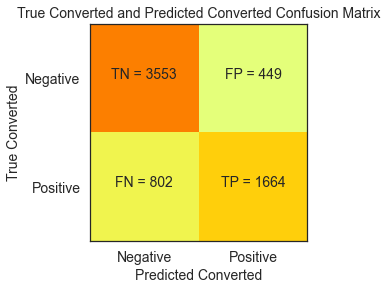

In [88]:
plot_confusion_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)

In [89]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                          y_train_pred_final.Converted_prob, drop_intermediate = False )

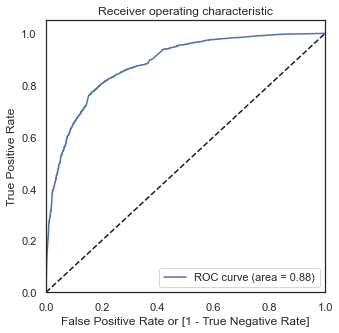

In [91]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [92]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.193373,1871,0,1,1,0,0,0,0,0,0,0,0
6795,0,0.220973,6795,0,1,1,1,0,0,0,0,0,0,0
3516,0,0.223121,3516,0,1,1,1,0,0,0,0,0,0,0
8105,0,0.862222,8105,1,1,1,1,1,1,1,1,1,1,0
3934,0,0.193373,3934,0,1,1,0,0,0,0,0,0,0,0


In [93]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensitivity, specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.619202     0.976480     0.399050
0.2          0.2  0.731602     0.896594     0.629935
0.3          0.3  0.788033     0.832522     0.760620
0.4          0.4  0.808751     0.777778     0.827836
0.5          0.5  0.806586     0.674777     0.887806
0.6          0.6  0.801330     0.605434     0.922039
0.7          0.7  0.784477     0.518654     0.948276
0.8          0.8  0.759276     0.418086     0.969515
0.9          0.9  0.713822     0.265207     0.990255


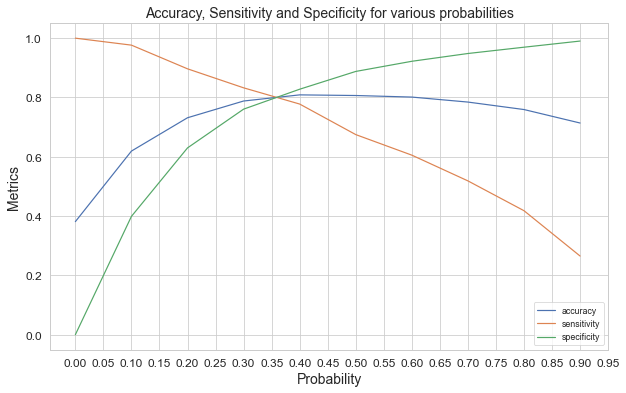

In [94]:
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(10,6))

plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.title('Accuracy, Sensitivity and Specificity for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

In [95]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
1871,0,0.193373,1871,0,1,1,0,0,0,0,0,0,0,0,0
6795,0,0.220973,6795,0,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.223121,3516,0,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.862222,8105,1,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.193373,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [96]:
get_metrics(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted'])

The Confusion Matrix is 
 [[3240  762]
 [ 498 1968]]
The Accuracy is    : 0.81 (0.8051948051948052)
The Sensitivity is : 0.8 (0.7980535279805353)
The Specificity is : 0.81 (0.8095952023988006)
The Precision is   : 0.72 (0.7208791208791209)
The Recall is      : 0.81 (0.8095952023988006)
The f1 score is    : 0.76 (0.7626658858584727)
The False Positive Rate is       : 0.19 (0.1904047976011994)
The Positive Predictive Value is : 0.72 (0.7208791208791209)
The Negative Predictive Value is : 0.87 (0.8667736757624398)


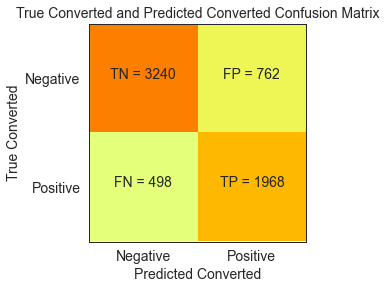

In [97]:
plot_confusion_metrics(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

In [98]:
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted']))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4002
           1       0.72      0.80      0.76      2466

    accuracy                           0.81      6468
   macro avg       0.79      0.80      0.80      6468
weighted avg       0.81      0.81      0.81      6468



In [99]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
1871,0,0.193373,1871,0,19
6795,0,0.220973,6795,0,22
3516,0,0.223121,3516,0,22
8105,0,0.862222,8105,1,86
3934,0,0.193373,3934,0,19


In [100]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
1871,0,0.193373,1871,0,1,1,0,0,0,0,0,0,0,0,0,19
6795,0,0.220973,6795,0,1,1,1,0,0,0,0,0,0,0,0,22
3516,0,0.223121,3516,0,1,1,1,0,0,0,0,0,0,0,0,22
8105,0,0.862222,8105,1,1,1,1,1,1,1,1,1,1,0,1,86
3934,0,0.193373,3934,0,1,1,0,0,0,0,0,0,0,0,0,19


In [101]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

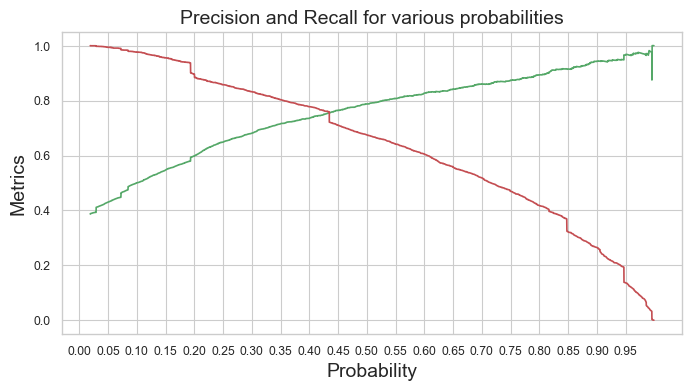

In [102]:
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.title('Precision and Recall for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

In [103]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_not provided,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_not provided,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Courses,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided
4269,0,1.433341,0.964504,2.892276,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2376,0,-1.022595,-0.885371,-1.180474,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7766,0,0.512365,-0.777416,1.364995,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
9199,0,-1.022595,-0.885371,-1.180474,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4359,0,-1.022595,-0.885371,-1.180474,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [104]:
X_test = X_test[rfe_columns]
X_test_sm = sm.add_constant(X_test)
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_not provided,What is your current occupation_Working Professional,What is your current occupation_not provided
4269,0,0.964504,0,1,0,0,0,1,0,0,1
2376,0,-0.885371,1,0,0,0,0,1,0,0,0
7766,0,-0.777416,0,0,0,0,0,0,0,1,0
9199,0,-0.885371,0,0,0,0,1,0,0,0,0
4359,0,-0.885371,1,0,0,0,0,0,0,0,0


In [105]:
y_test_pred = result.predict(X_test_sm)

In [106]:
y_test_pred[:10]

4269    0.419743
2376    0.946926
7766    0.767281
9199    0.084678
4359    0.847596
9186    0.685795
1631    0.574038
8963    0.274591
8007    0.035516
5324    0.502533
dtype: float64

In [107]:
y_test_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_pred_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_testest_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)

# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_test_pred_final.head(10)

,Converted,Converted_prob,Prospect ID
0,1,0.419743,4269
1,1,0.946926,2376
2,1,0.767281,7766
3,0,0.084678,9199
4,1,0.847596,4359
5,1,0.685795,9186
6,1,0.574038,1631
7,1,0.274591,8963
8,0,0.035516,8007
9,1,0.502533,5324


In [108]:
y_test_pred_final = y_test_pred_final[['Prospect ID','Converted','Converted_prob']]
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))
y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.419743,42
1,2376,1,0.946926,95
2,7766,1,0.767281,77
3,9199,0,0.084678,8
4,4359,1,0.847596,85


In [109]:
y_test_pred_final['final_Predicted'] = y_test_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.36 else 0)

y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.419743,42,1
1,2376,1,0.946926,95,1
2,7766,1,0.767281,77,1
3,9199,0,0.084678,8,0
4,4359,1,0.847596,85,1


In [110]:
print (f'The Final Evaluation Metrics for the test Dataset: ')
print (f'---------------------------------------------------')
get_metrics(y_test_pred_final['Converted'], y_test_pred_final['final_Predicted'])

The Final Evaluation Metrics for the test Dataset: 
---------------------------------------------------
The Confusion Matrix is 
 [[1365  312]
 [ 220  875]]
The Accuracy is    : 0.81 (0.8080808080808081)
The Sensitivity is : 0.8 (0.7990867579908676)
The Specificity is : 0.81 (0.813953488372093)
The Precision is   : 0.74 (0.7371524852569503)
The Recall is      : 0.81 (0.813953488372093)
The f1 score is    : 0.77 (0.7736516357206012)
The False Positive Rate is       : 0.19 (0.18604651162790697)
The Positive Predictive Value is : 0.74 (0.7371524852569503)
The Negative Predictive Value is : 0.86 (0.861198738170347)


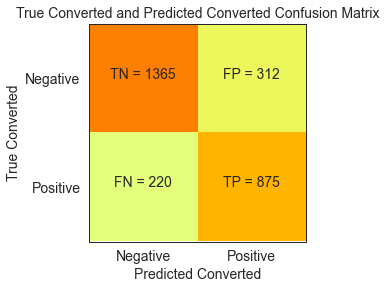

In [111]:
plot_confusion_metrics(y_test_pred_final.Converted, y_test_pred_final.final_Predicted)

In [112]:
print (classification_report(y_test_pred_final['Converted'], y_test_pred_final['final_Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1677
           1       0.74      0.80      0.77      1095

    accuracy                           0.81      2772
   macro avg       0.80      0.81      0.80      2772
weighted avg       0.81      0.81      0.81      2772



In [113]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
1871,0,0.193373,1871,0,1,1,0,0,0,0,0,0,0,0,0,19
6795,0,0.220973,6795,0,1,1,1,0,0,0,0,0,0,0,0,22
3516,0,0.223121,3516,0,1,1,1,0,0,0,0,0,0,0,0,22
8105,0,0.862222,8105,1,1,1,1,1,1,1,1,1,1,0,1,86
3934,0,0.193373,3934,0,1,1,0,0,0,0,0,0,0,0,0,19


In [114]:
y_train_score = y_train_pred_final[['Prospect ID','Lead_Score']]

# Create Dataset with y_test Prospect ID and Lead score
y_test_score = y_test_pred_final[['Prospect ID','Lead_Score']]

# Concatenate the y_train scores and the y_test scores
df_score = pd.concat([y_train_score, y_test_score], ignore_index=True)

# Set the index of the final score dataset as the Prospect ID to concatenate the score dataset to the original data
df_score.set_index('Prospect ID', inplace=True)

# Inner Join the Original Leads dataset with the scores dataset. This will add a new column 'Lead_Score' to the 
# Original dataset. 
data = data.join(df_score['Lead_Score'])

data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_not provided,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_not provided,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Courses,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,Lead_Score
0,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,19
1,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,33
2,0,1,2.0,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,63
3,0,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,17
4,0,1,2.0,1428,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,42


In [115]:
model_params = result.params[1:]
model_params

Do Not Email                                           -1.387175
Total Time Spent on Website                             0.931508
Lead Origin_Lead Add Form                               3.144110
Lead Source_Direct Traffic                             -0.661820
Lead Source_Organic Search                             -0.431031
Last Activity_Converted to Lead                        -1.337094
Last Activity_Olark Chat Conversation                  -0.952187
Last Activity_SMS Sent                                  1.165662
Last Activity_not provided                             -1.441466
What is your current occupation_Working Professional    2.520698
What is your current occupation_not provided           -1.122603
dtype: float64

In [116]:
feature_importance = model_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                            -44.119795
Total Time Spent on Website                              29.627067
Lead Origin_Lead Add Form                               100.000000
Lead Source_Direct Traffic                              -21.049521
Lead Source_Organic Search                              -13.709160
Last Activity_Converted to Lead                         -42.526932
Last Activity_Olark Chat Conversation                   -30.284782
Last Activity_SMS Sent                                   37.074470
Last Activity_not provided                              -45.846555
What is your current occupation_Working Professional     80.172059
What is your current occupation_not provided            -35.704966
dtype: float64

In [117]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                             8
Total Time Spent on Website                              0
Lead Origin_Lead Add Form                                5
Lead Source_Direct Traffic                              10
Lead Source_Organic Search                               6
Last Activity_Converted to Lead                          3
Last Activity_Olark Chat Conversation                    4
Last Activity_SMS Sent                                   1
Last Activity_not provided                               7
What is your current occupation_Working Professional     9
What is your current occupation_not provided             2
dtype: int64

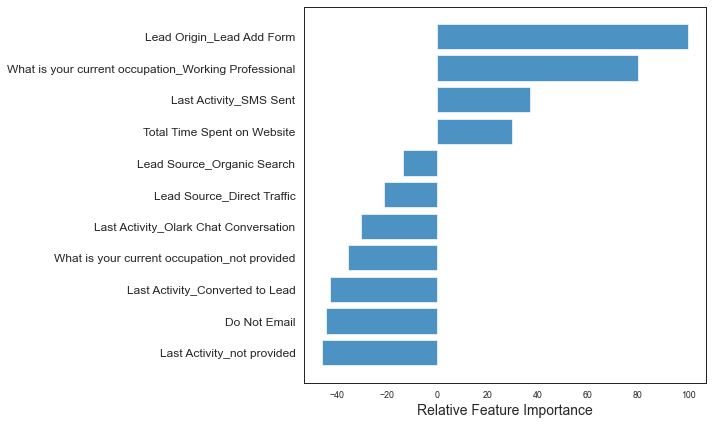

In [118]:
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[rfe_columns].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()